<a href="https://colab.research.google.com/github/Manlikemurph/food-adulteration-/blob/master/Raw_Foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai import *
from fastai.vision import *
from fastai.core import *
from io import BytesIO

In [6]:
import fastai
print(f'fastai: {fastai.__version__}')
print(f'cuda: {torch.cuda.is_available()}')

fastai: 1.0.55
cuda: True


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = '/content/drive/My Drive/fastai/Raw Foods'

In [4]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  4 classes:
 ['adulterated', 'models', 'Not food', 'not adulterated']


In [0]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

In [47]:
data  = ImageDataBunch.from_folder(PATH, classes, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 425 training images and 106 validation images.


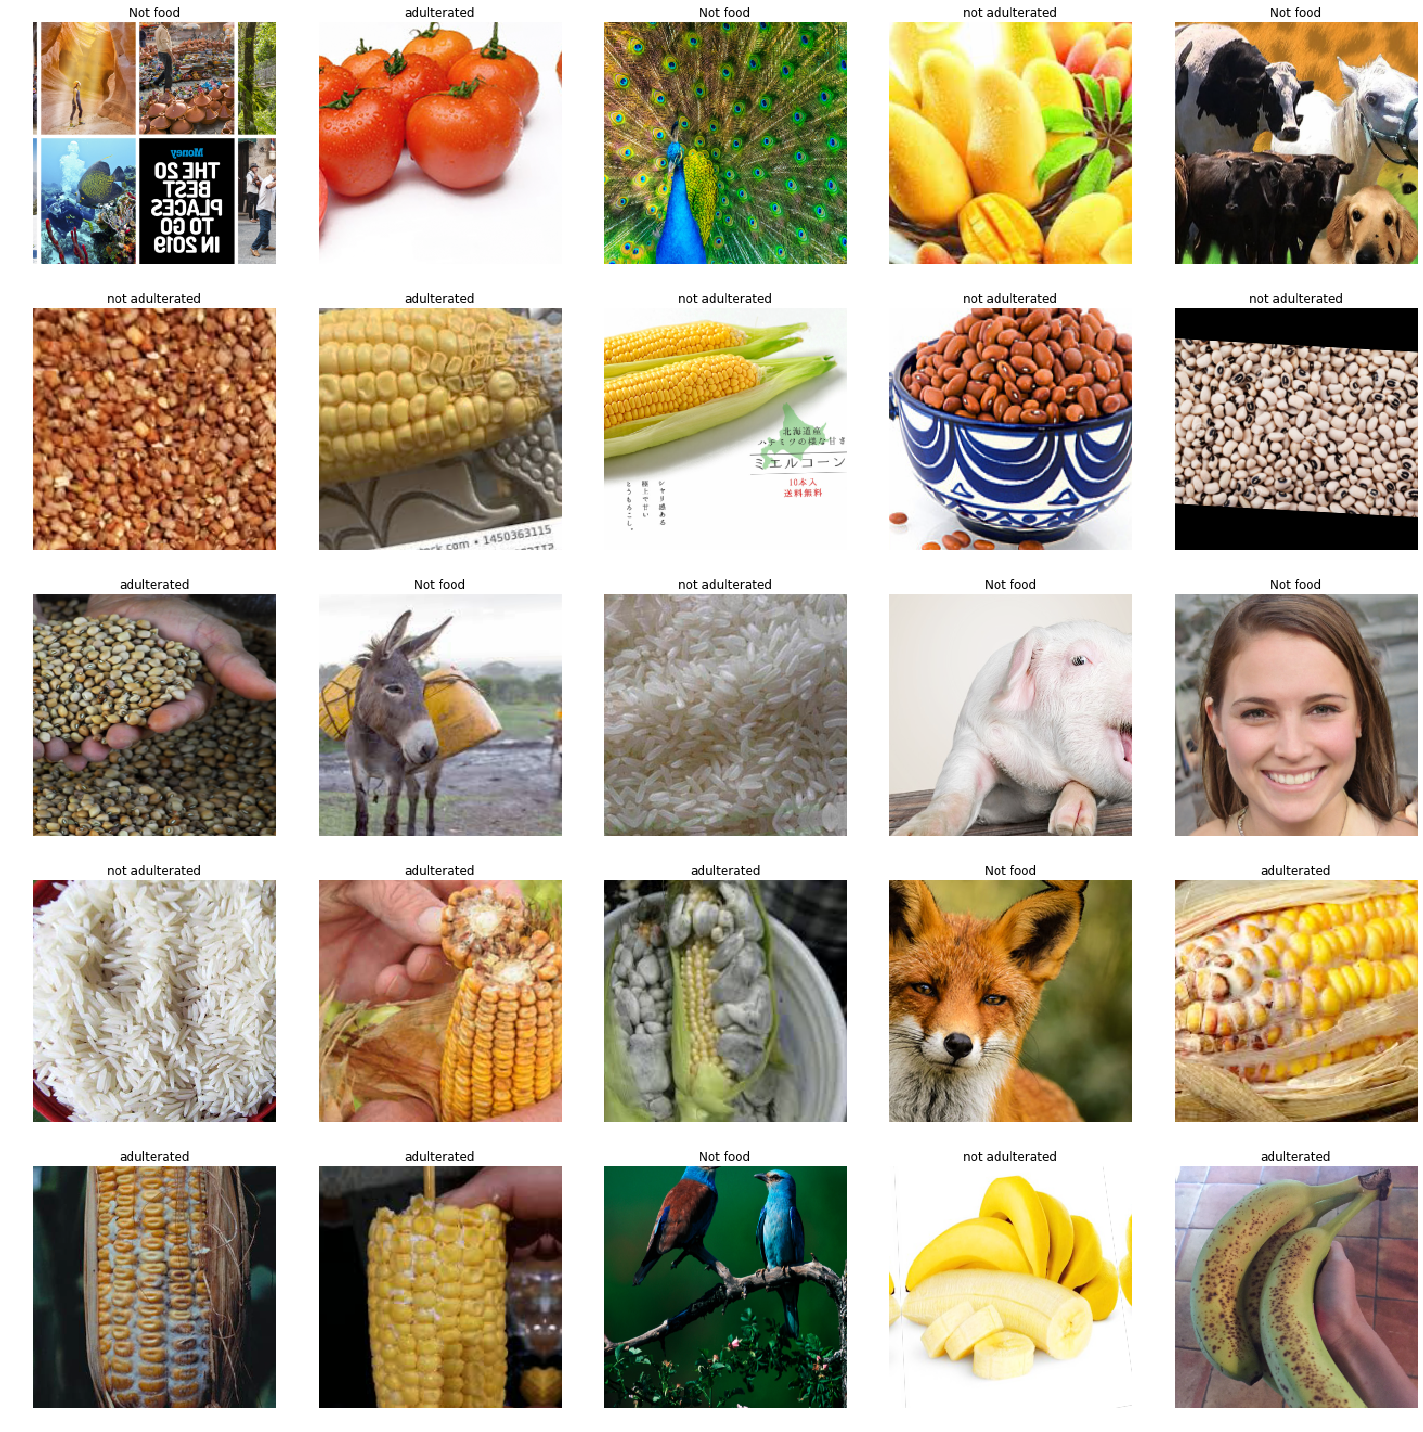

In [9]:
data.show_batch(rows=5)

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 108432081.96it/s]


In [11]:
learn.fit_one_cycle(4)

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

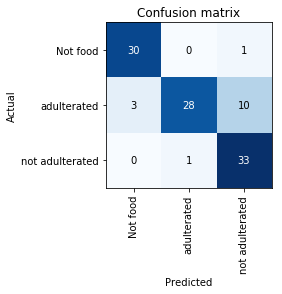

In [13]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('adulterated', 'non adulterated', 6), ('non adulterated', 'adulterated', 3)]

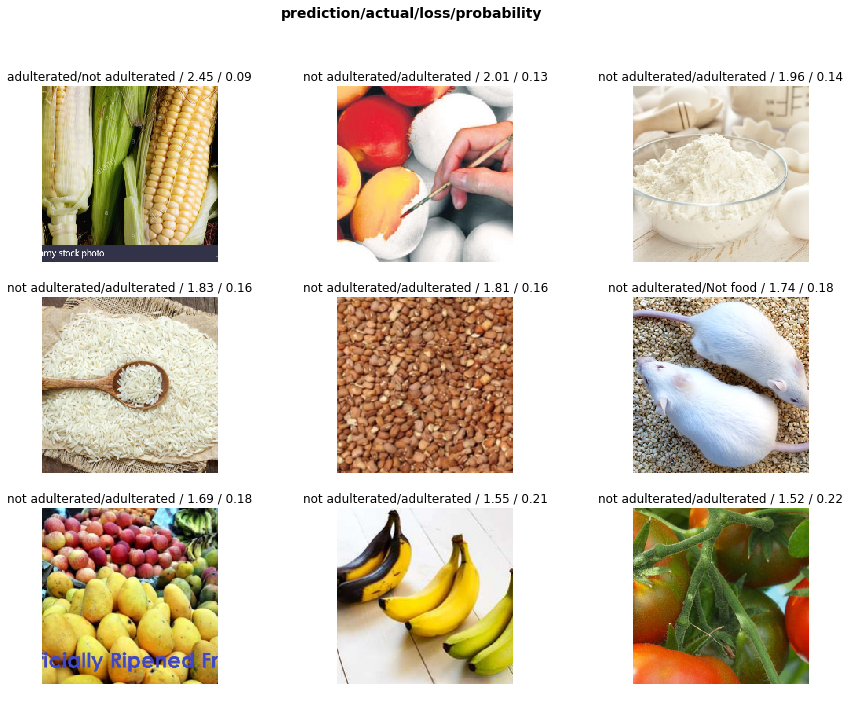

In [14]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [0]:
learn = Learner(data, model)

In [0]:
learn.export('resnet30.pkl')

In [0]:
model_name = 'resnet34'

In [27]:
path = learn.path
path

PosixPath('/content/drive/My Drive/fastai/Raw Foods')

In [0]:
learn = load_learner(path)

In [0]:
learn = load_learner(path, 'resnet30.pkl')

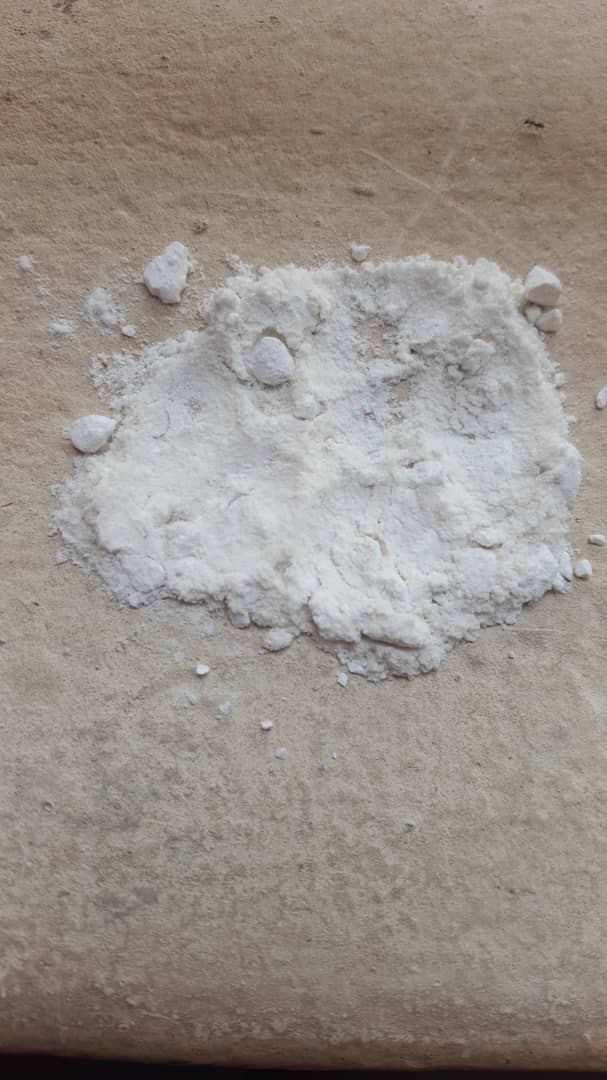

In [19]:
filename = '/content/drive/My Drive/fastai/Test/testtest.jpeg'
img = open_image(filename)
img

In [20]:
pred_class,pred_idx,outputs = learn.predict(img)
print("It is ", pred_class)

It is  adulterated


In [0]:
from fastai.widgets import *

In [44]:

for i,img in enumerate(filename):
    

    # Get best first prediction
    pred_1_class, indice, preds = learn.predict(img)

    # Get all best predictions
    preds_sorted, idxs = preds.sort(descending=True)
    
    # Get best 3 predictions - classes
    pred_2_class = learn.data.classes[idxs[1]]
    pred_3_class = learn.data.classes[idxs[2]]
    
    # Get best 3 predictions - probabilities
    pred_1_prob = np.round(100*preds_sorted[0].item(),2)
    pred_2_prob = np.round(100*preds_sorted[1].item(),2)
    pred_3_prob = np.round(100*preds_sorted[2].item(),2)
    preds_best3 = [f'{pred_1_class} ({pred_1_prob}%)', f'{pred_2_class} ({pred_2_prob}%)', f'{pred_3_class} ({pred_3_prob}%)']
    
    # Display images with True label / 1st, 2nd and 3rd best Predictions
    img.show(img=img,
             title=f'(true label) {class_name}\n(1st) {preds_best3[0]}\n(2nd) {preds_best3[1]}\n(3rd) {preds_best3[2]} {i+1}')

AttributeError: ignored